In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
import time
TrainingPath1 = "/content/gdrive/MyDrive/Project Dataset/yellow_tripdata_2020-01.csv"
TrainingPath2 = "/content/gdrive/MyDrive/Project Dataset/yellow_tripdata_2020-02.csv"
TrainingPath3 = "/content/gdrive/MyDrive/Project Dataset/yellow_tripdata_2020-03.csv"
LookUpPath = "/content/gdrive/MyDrive/Project Dataset/taxi_zone_lookup.csv"

In [ ]:
df1 = pd.read_csv(TrainingPath3)
df1

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.00,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,6.00,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,5.00,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,16.50,3.0,0.5,4.05,0.0,0.3,24.35,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007287,NaN,2020-03-31 23:21:00,2020-03-31 23:33:00,NaN,5.43,NaN,NaN,137,87,NaN,30.47,0.0,0.5,0.00,0.0,0.3,33.77,2.5
3007288,NaN,2020-03-31 23:57:00,2020-04-01 00:26:00,NaN,13.21,NaN,NaN,137,71,NaN,37.97,0.0,0.5,0.00,0.0,0.3,41.27,2.5
3007289,NaN,2020-03-31 23:22:01,2020-03-31 23:43:52,NaN,12.14,NaN,NaN,137,32,NaN,37.10,0.0,0.0,0.00,0.0,0.3,39.90,2.5
3007290,NaN,2020-03-31 23:18:53,2020-03-31 23:32:21,NaN,7.01,NaN,NaN,137,159,NaN,20.07,0.0,0.0,0.00,0.0,0.3,22.87,2.5


In [ ]:
#df2 = pd.read_csv(TrainingPath2)
#df2.head()

In [ ]:
#df3 = pd.read_csv(TrainingPath3)
#df3.head()

In [ ]:
#Using the dataset of months jan, feb and march of 2020
Main_df = pd.concat([df1])
Main_df.shape

(3007292, 18)

In [ ]:
Main_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [ ]:
Main_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,2.969805e+06,2.969805e+06,3.007292e+06,2.969805e+06,3.007292e+06,3.007292e+06,2.969805e+06,3.007292e+06,3.007292e+06,3.007292e+06,3.007292e+06,3.007292e+06,3.007292e+06,3.007292e+06,3.007292e+06
mean,1.667242e+00,1.467486e+00,3.116722e+00,1.051378e+00,1.634186e+02,1.609385e+02,1.267743e+00,1.269675e+01,1.246666e+00,6.580587e-01,2.138793e+00,3.041657e-01,2.975907e-01,1.884122e+01,2.241648e+00
std,4.712009e-01,1.120098e+00,2.069343e+02,7.109302e-01,6.658183e+01,7.073925e+01,4.765033e-01,3.871551e+02,2.883275e+02,2.883250e+02,2.719280e+00,1.607296e+00,3.710814e-02,6.945971e+02,7.841027e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.259000e+03,-7.000000e+00,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.900000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,3.020000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.985000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.698037e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,5.000008e+05,5.000005e+05,8.000000e+02,6.010200e+02,3.000000e-01,1.000004e+06,2.500000e+00


In [ ]:
Main_df.shape

(3007292, 18)

In [ ]:
#NullValues
Main_df.isnull()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007287,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False
3007288,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False
3007289,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False
3007290,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
#Data Cleaning on Location
#NewYork city LOcation IDs are in range = (1, 263)
#src = https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Main_df = Main_df[((Main_df['PULocationID']>=1) & (Main_df['PULocationID']<=263)) & ((Main_df['DOLocationID']>=1) & (Main_df['DOLocationID']<=263))]
print("Shape of the data points after preprocessing on Location: ", Main_df.shape)

Shape of the data points after preprocessing on Location:  (2975588, 18)


In [ ]:
len(Main_df['tpep_pickup_datetime'].values)

2975588

In [ ]:
#Data Cleaning on Trip Duration

#Pickup Time
pickup_time = []
for str in Main_df['tpep_pickup_datetime'].values:
  d = time.mktime(datetime.datetime.strptime(str, "%Y-%m-%d %H:%M:%S").timetuple())
  pickup_time.append(d)





In [ ]:
print(pickup_time[0:100])

[1583022673.0, 1583021302.0, 1583023938.0, 1583023673.0, 1583023399.0, 1583021083.0, 1583023401.0, 1583023895.0, 1583021622.0, 1583022305.0, 1583022787.0, 1583023622.0, 1583020864.0, 1583021743.0, 1583020808.0, 1583021683.0, 1583024216.0, 1583020885.0, 1583022074.0, 1583022935.0, 1583024105.0, 1583022563.0, 1583023068.0, 1583021122.0, 1583022548.0, 1583022103.0, 1583023572.0, 1583021311.0, 1583021021.0, 1583024227.0, 1583022841.0, 1583023789.0, 1583021398.0, 1583023336.0, 1583021644.0, 1583023693.0, 1583022884.0, 1583024279.0, 1583021921.0, 1583023067.0, 1583023013.0, 1583023264.0, 1583024213.0, 1583022581.0, 1583021290.0, 1583021965.0, 1583023432.0, 1583020890.0, 1583021655.0, 1583022316.0, 1583021409.0, 1583023755.0, 1583023740.0, 1583022383.0, 1583023485.0, 1583023246.0, 1583024280.0, 1583021460.0, 1583023587.0, 1583021071.0, 1583022309.0, 1583023618.0, 1583022483.0, 1583020934.0, 1583022734.0, 1583023833.0, 1583022231.0, 1583023407.0, 1583023699.0, 1583021113.0, 1583022361.0, 15830

In [ ]:
#Calculating Drop off time
dropoff_time = []
for str in Main_df['tpep_dropoff_datetime'].values:
  d = time.mktime(datetime.datetime.strptime(str, "%Y-%m-%d %H:%M:%S").timetuple())
  dropoff_time.append(d)

In [ ]:
print(dropoff_time[0:100])

[1583024502.0, 1583021329.0, 1583024356.0, 1583023857.0, 1583024307.0, 1583022197.0, 1583025276.0, 1583024417.0, 1583022180.0, 1583022666.0, 1583023398.0, 1583024375.0, 1583021649.0, 1583023617.0, 1583021326.0, 1583023020.0, 1583025227.0, 1583021281.0, 1583022647.0, 1583023381.0, 1583024482.0, 1583022764.0, 1583023879.0, 1583022215.0, 1583023657.0, 1583022788.0, 1583024151.0, 1583022001.0, 1583021965.0, 1583025130.0, 1583023306.0, 1583024715.0, 1583021769.0, 1583024360.0, 1583022026.0, 1583024031.0, 1583023162.0, 1583024676.0, 1583022638.0, 1583023337.0, 1583023176.0, 1583023545.0, 1583026097.0, 1583024541.0, 1583021470.0, 1583022187.0, 1583024129.0, 1583021535.0, 1583022226.0, 1583023500.0, 1583022259.0, 1583026067.0, 1583024489.0, 1583023213.0, 1583025717.0, 1583023642.0, 1583025183.0, 1583022439.0, 1583025072.0, 1583021474.0, 1583023401.0, 1583025110.0, 1583023574.0, 1583021843.0, 1583023542.0, 1583025083.0, 1583023290.0, 1583023531.0, 1583024208.0, 1583022020.0, 1583022760.0, 15830

In [ ]:
durations = abs((np.array(dropoff_time) - np.array(pickup_time))/float(60))
Main_df['trip_duration'] = durations
print(Main_df.head())

   VendorID tpep_pickup_datetime  ... congestion_surcharge  trip_duration
0       1.0  2020-03-01 00:31:13  ...                  2.5      30.483333
1       2.0  2020-03-01 00:08:22  ...                  0.0       0.450000
2       1.0  2020-03-01 00:52:18  ...                  2.5       6.966667
3       2.0  2020-03-01 00:47:53  ...                  2.5       3.066667
4       1.0  2020-03-01 00:43:19  ...                  2.5      15.133333

[5 rows x 19 columns]


In [ ]:
#Percentiles
duration_at_01=Main_df['trip_duration'].quantile(0.1)
print(duration_at_01) #trip duration at 1 percentile

duration_at_09=Main_df['trip_duration'].quantile(0.9)
print(duration_at_09) #trip duration at 90 percentile

duration_at_99=Main_df['trip_duration'].quantile(0.99)
print(duration_at_99) #trip duration at 99.0 percentile

duration_at_999=Main_df['trip_duration'].quantile(0.999)
print(duration_at_999) #trip duration at 99.9 percentile

3.9
25.45
53.766666666666666
1412.7


In [ ]:
#Boxplot before cleaning
#sns.boxenplot(y='trip_duration', data=Main_df)

In [ ]:
Main_df = Main_df[(Main_df['trip_duration']>1) & (Main_df['trip_duration']<720)]
print(Main_df)

         VendorID tpep_pickup_datetime  ... congestion_surcharge  trip_duration
0             1.0  2020-03-01 00:31:13  ...                  2.5      30.483333
2             1.0  2020-03-01 00:52:18  ...                  2.5       6.966667
3             2.0  2020-03-01 00:47:53  ...                  2.5       3.066667
4             1.0  2020-03-01 00:43:19  ...                  2.5      15.133333
5             1.0  2020-03-01 00:04:43  ...                  2.5      18.566667
...           ...                  ...  ...                  ...            ...
3007287       NaN  2020-03-31 23:21:00  ...                  2.5      12.000000
3007288       NaN  2020-03-31 23:57:00  ...                  2.5      29.000000
3007289       NaN  2020-03-31 23:22:01  ...                  2.5      21.850000
3007290       NaN  2020-03-31 23:18:53  ...                  2.5      13.466667
3007291       NaN  2020-03-31 23:11:00  ...                  0.0      19.000000

[2945314 rows x 19 columns]


In [ ]:
#Boxplot after cleaning
#sns.boxenplot(y='trip_duration', data=Main_df)

In [ ]:
#Dstribution plot for trip duration
#sns.displot(Main_df, x="trip_duration", kind="kde")

In [ ]:
#Cleaning on Speed
Main_df['speed'] = 60*(Main_df['trip_distance']/Main_df['trip_duration'])
print(Main_df)

         VendorID tpep_pickup_datetime  ... trip_duration      speed
0             1.0  2020-03-01 00:31:13  ...     30.483333   9.250957
2             1.0  2020-03-01 00:52:18  ...      6.966667   9.473684
3             2.0  2020-03-01 00:47:53  ...      3.066667  17.021739
4             1.0  2020-03-01 00:43:19  ...     15.133333  17.444934
5             1.0  2020-03-01 00:04:43  ...     18.566667  11.310592
...           ...                  ...  ...           ...        ...
3007287       NaN  2020-03-31 23:21:00  ...     12.000000  27.150000
3007288       NaN  2020-03-31 23:57:00  ...     29.000000  27.331034
3007289       NaN  2020-03-31 23:22:01  ...     21.850000  33.336384
3007290       NaN  2020-03-31 23:18:53  ...     13.466667  31.232673
3007291       NaN  2020-03-31 23:11:00  ...     19.000000  19.926316

[2945314 rows x 20 columns]


In [ ]:
#Percentiles for speed
speed_at_00=Main_df['speed'].quantile(0.00)
print(speed_at_00) #speed at 0 percentile

speed_at_01=Main_df['speed'].quantile(0.1)
print(speed_at_01) #speed at 1 percentile

speed_at_09=Main_df['speed'].quantile(0.9)
print(speed_at_09) #speed at 90 percentile

speed_at_99=Main_df['speed'].quantile(0.99)
print(speed_at_99) #speed at 99.0 percentile

speed_at_999=Main_df['speed'].quantile(0.999)
print(speed_at_999) #speed at 99.9 percentile

speed_at_9999=Main_df['speed'].quantile(0.9999)
print(speed_at_9999) #speed at 99.99 percentile

speed_at_99999=Main_df['speed'].quantile(0.99999)
print(speed_at_99999) #speed at 99.999 percentile

0.0
6.171428571428572
20.0
37.103517680142005
47.577801830947536
58.57401285254454
557.4106857153986


In [ ]:
#Boxplot before cleaning
#sns.boxenplot(y='speed', data=Main_df)

In [ ]:
Main_df = Main_df[(Main_df['speed']>0) & (Main_df['speed']<56.225679661650766)]
print(Main_df)

         VendorID tpep_pickup_datetime  ... trip_duration      speed
0             1.0  2020-03-01 00:31:13  ...     30.483333   9.250957
2             1.0  2020-03-01 00:52:18  ...      6.966667   9.473684
3             2.0  2020-03-01 00:47:53  ...      3.066667  17.021739
4             1.0  2020-03-01 00:43:19  ...     15.133333  17.444934
5             1.0  2020-03-01 00:04:43  ...     18.566667  11.310592
...           ...                  ...  ...           ...        ...
3007287       NaN  2020-03-31 23:21:00  ...     12.000000  27.150000
3007288       NaN  2020-03-31 23:57:00  ...     29.000000  27.331034
3007289       NaN  2020-03-31 23:22:01  ...     21.850000  33.336384
3007290       NaN  2020-03-31 23:18:53  ...     13.466667  31.232673
3007291       NaN  2020-03-31 23:11:00  ...     19.000000  19.926316

[2933058 rows x 20 columns]


In [ ]:
#Boxplot after cleaning
#sns.boxenplot(y='speed', data=Main_df)

In [ ]:
#Cleaning on total amount
#Before cleaning on total amount
#sns.boxenplot(y='total_amount', data=Main_df)

In [ ]:
#Percentiles for Total amount
ta_at_00=Main_df['total_amount'].quantile(0.00)
print(ta_at_00) #total_amount at 0 percentile

ta_at_09=Main_df['total_amount'].quantile(0.9)
print(ta_at_09) #total_amount at 90 percentile

ta_at_99=Main_df['total_amount'].quantile(0.99)
print(ta_at_99) #total_amount at 99.0 percentile

ta_at_999=Main_df['total_amount'].quantile(0.999)
print(ta_at_999) #total_amount at 99.9 percentile

ta_at_9999=Main_df['total_amount'].quantile(0.9999)
print(ta_at_9999) #total_amount at 99.99 percentile

ta_at_999999=Main_df['total_amount'].quantile(0.999999)
print(ta_at_999999) #total_amount at 99.9999 percentile

ta_at_9999999=Main_df['total_amount'].quantile(0.9999999)
print(ta_at_9999999) #total_amount at 99.99999 percentile

ta_at_100=Main_df['total_amount'].quantile(1)
print(ta_at_100) #total_amount at 100 percentile

-502.02
30.29
73.67
97.73829000001308
138.33471499998123
634.0644703713152
474505.67711435794
671103.17


In [ ]:
Main_df = Main_df[(Main_df['total_amount']>0) & (Main_df['total_amount']<= 585.2633575955033)]
print(Main_df)

         VendorID tpep_pickup_datetime  ... trip_duration      speed
0             1.0  2020-03-01 00:31:13  ...     30.483333   9.250957
2             1.0  2020-03-01 00:52:18  ...      6.966667   9.473684
3             2.0  2020-03-01 00:47:53  ...      3.066667  17.021739
4             1.0  2020-03-01 00:43:19  ...     15.133333  17.444934
5             1.0  2020-03-01 00:04:43  ...     18.566667  11.310592
...           ...                  ...  ...           ...        ...
3007287       NaN  2020-03-31 23:21:00  ...     12.000000  27.150000
3007288       NaN  2020-03-31 23:57:00  ...     29.000000  27.331034
3007289       NaN  2020-03-31 23:22:01  ...     21.850000  33.336384
3007290       NaN  2020-03-31 23:18:53  ...     13.466667  31.232673
3007291       NaN  2020-03-31 23:11:00  ...     19.000000  19.926316

[2924175 rows x 20 columns]


In [ ]:
#After cleaning on total amount
#sns.boxenplot(y='total_amount', data=Main_df)

In [ ]:
#Cleaning on Distance
#Before cleaning 
#sns.boxenplot(y='trip_distance', data=Main_df)

In [ ]:
#Percentiles for Total amount
td_at_00=Main_df['trip_distance'].quantile(0.00)
print(td_at_00) #trip_distance at 0 percentile

td_at_09=Main_df['trip_distance'].quantile(0.9)
print(td_at_09) #trip_distance at 90 percentile

td_at_99=Main_df['trip_distance'].quantile(0.99)
print(td_at_99) #trip_distance at 99.0 percentile

td_at_999=Main_df['trip_distance'].quantile(0.999)
print(td_at_999) #trip_distance at 99.9 percentile

td_at_9999=Main_df['trip_distance'].quantile(0.9999)
print(td_at_9999) #trip_distance at 99.99 percentile

td_at_999999=Main_df['trip_distance'].quantile(0.999999)
print(td_at_999999) #trip_distance at 99.9999 percentile

td_at_9999999=Main_df['trip_distance'].quantile(0.9999999)
print(td_at_9999999) #trip_distance at 99.99999 percentile

td_at_100=Main_df['trip_distance'].quantile(1)
print(td_at_100) #trip_distance at 100 percentile

0.01
6.44
18.71
25.0682600000035
35.28747799999546
101.89857379994355
149.92492512464523
153.2


In [ ]:
Main_df = Main_df[(Main_df['trip_distance']>0) & (Main_df['trip_distance']<= 33.2935949999839)]
print(Main_df)

         VendorID tpep_pickup_datetime  ... trip_duration      speed
0             1.0  2020-03-01 00:31:13  ...     30.483333   9.250957
2             1.0  2020-03-01 00:52:18  ...      6.966667   9.473684
3             2.0  2020-03-01 00:47:53  ...      3.066667  17.021739
4             1.0  2020-03-01 00:43:19  ...     15.133333  17.444934
5             1.0  2020-03-01 00:04:43  ...     18.566667  11.310592
...           ...                  ...  ...           ...        ...
3007287       NaN  2020-03-31 23:21:00  ...     12.000000  27.150000
3007288       NaN  2020-03-31 23:57:00  ...     29.000000  27.331034
3007289       NaN  2020-03-31 23:22:01  ...     21.850000  33.336384
3007290       NaN  2020-03-31 23:18:53  ...     13.466667  31.232673
3007291       NaN  2020-03-31 23:11:00  ...     19.000000  19.926316

[2923798 rows x 20 columns]


In [ ]:
#After cleaning on trip_distance
#sns.boxenplot(y='trip_distance', data=Main_df)

In [ ]:

average_speed = sum(Main_df['speed'])/float(len(Main_df['speed']))
print(average_speed)

#11.691415935750623 is covered in 1 Hours, so approx 3 miles will be covered in 15 minutes.

12.132872725232353


In [ ]:
import pandas as pd
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

In [ ]:
df = pd.read_csv(LookUpPath)
LookUp_df = df[0:263]
LookUp_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
258,259,Bronx,Woodlawn/Wakefield,Boro Zone
259,260,Queens,Woodside,Boro Zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone


In [ ]:
Zone_list = []
zone_split_list = LookUp_df['Zone'].str.split(pat = "/")
for i in range(len(zone_split_list)):
  if(len(zone_split_list[i])>1):
    Zone_list.append(zone_split_list[i][0])

  else:
    Zone_list.append(zone_split_list[i][0])
  
len(Zone_list)

263

In [ ]:
LookUp_df['Zone_unique'] = Zone_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
LookUp_df = LookUp_df.drop(['Zone'], axis=1)

In [ ]:
Latitude = []
Longitude = []
geolocator = Nominatim(user_agent="Machine Learning Project", timeout = 10)
for str in LookUp_df['Zone_unique']:
  if geolocator.geocode(str)!= None:
    Latitude.append(geolocator.geocode(str).latitude)
    Longitude.append(geolocator.geocode(str).longitude)

  else:
    Latitude.append(np.nan) 
    Longitude.append(np.nan) 

In [ ]:
LookUp_df['Latitude'] = Latitude
LookUp_df['Longitude'] = Longitude
print(LookUp_df.iloc[255]['Zone_unique'])
str="Williamsburg"
print(geolocator.geocode(str).latitude)
geolocator.geocode(str).longitude

Williamsburg (South Side)
37.27892105


-76.69448606443117

In [ ]:
LookUp_df

,LocationID,Borough,service_zone,Zone_unique,Latitude,Longitude
0,1,EWR,EWR,Newark Airport,40.689064,-74.177255
1,2,Queens,Boro Zone,Jamaica Bay,40.603994,-73.835412
2,3,Bronx,Boro Zone,Allerton,39.915319,-87.933215
3,4,Manhattan,Yellow Zone,Alphabet City,40.725102,-73.979583
4,5,Staten Island,Boro Zone,Arden Heights,53.284320,-7.492801
...,...,...,...,...,...,...
258,259,Bronx,Boro Zone,Woodlawn,38.330050,-89.032569
259,260,Queens,Boro Zone,Woodside,37.429939,-122.253856
260,261,Manhattan,Yellow Zone,World Trade Center,40.711888,-74.012441
261,262,Manhattan,Yellow Zone,Yorkville East,40.778007,-73.948202


In [ ]:
len(LookUp_df['Zone_unique'].unique())

254

In [ ]:
LookUp_df.loc[255, 'Latitude'] = 37.27892105
LookUp_df.loc[255, 'Longitude'] = -76.69448606443117

In [ ]:
LookUp_df[240:260]

,LocationID,Borough,service_zone,Zone_unique,Latitude,Longitude
240,241,Bronx,Boro Zone,Van Cortlandt Village,41.248694,-73.908586
241,242,Bronx,Boro Zone,Van Nest,40.848434,-73.863746
242,243,Manhattan,Boro Zone,Washington Heights North,40.840198,-73.940221
243,244,Manhattan,Boro Zone,Washington Heights South,40.883325,-72.515328
244,245,Staten Island,Boro Zone,West Brighton,40.578087,-73.974925
245,246,Manhattan,Yellow Zone,West Chelsea,37.915937,-96.785860
246,247,Bronx,Boro Zone,West Concourse,40.190987,-74.029083
247,248,Bronx,Boro Zone,West Farms,40.192057,-74.201255
248,249,Manhattan,Yellow Zone,West Village,40.734186,-74.005580
249,250,Bronx,Boro Zone,Westchester Village,42.539702,-83.255017


In [ ]:
LookUp_df_PULocation = LookUp_df.rename(columns={'LocationID': 'PULocationID'})
LookUp_df_PULocation = LookUp_df_PULocation.drop(['Borough', 'Zone_unique', 'service_zone'], axis=1)
LookUp_df_PULocation[240:260]

,PULocationID,Latitude,Longitude
240,241,41.248694,-73.908586
241,242,40.848434,-73.863746
242,243,40.840198,-73.940221
243,244,40.883325,-72.515328
244,245,40.578087,-73.974925
245,246,37.915937,-96.785860
246,247,40.190987,-74.029083
247,248,40.192057,-74.201255
248,249,40.734186,-74.005580
249,250,42.539702,-83.255017


In [ ]:
Main_df_loc = Main_df.merge(LookUp_df_PULocation, on='PULocationID')
Main_df_loc_PU = Main_df_loc.rename(columns={'Latitude': 'PULatitude', 'Longitude':'PULongitude'})
Main_df_loc_PU

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,speed,PULatitude,PULongitude
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.00,3.0,0.5,2.00,0.00,0.3,27.80,2.5,30.483333,9.250957,40.707612,-74.009378
1,1.0,2020-03-01 00:05:44,2020-03-01 00:19:54,2.0,8.00,1.0,N,88,263,2.0,23.50,3.0,0.5,0.00,0.00,0.3,27.30,2.5,14.166667,33.882353,40.707612,-74.009378
2,2.0,2020-03-01 00:27:15,2020-03-01 00:47:22,2.0,3.34,1.0,N,88,170,1.0,14.50,0.5,0.5,3.66,0.00,0.3,21.96,2.5,20.116667,9.961889,40.707612,-74.009378
3,1.0,2020-03-01 00:29:40,2020-03-01 00:42:38,2.0,3.60,1.0,N,88,79,2.0,13.50,3.0,0.5,0.00,0.00,0.3,17.30,2.5,12.966667,16.658098,40.707612,-74.009378
4,1.0,2020-03-01 00:41:27,2020-03-01 00:57:10,2.0,2.90,1.0,N,88,249,1.0,13.00,3.0,0.5,3.35,0.00,0.3,20.15,2.5,15.716667,11.071050,40.707612,-74.009378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923793,NaN,2020-03-09 17:30:00,2020-03-09 18:10:00,NaN,17.22,NaN,NaN,27,139,NaN,51.97,0.0,0.5,0.00,2.29,0.3,55.06,0.0,40.000000,25.830000,46.616630,-94.216935
2923794,NaN,2020-03-10 10:00:00,2020-03-10 10:20:00,NaN,7.72,NaN,NaN,27,91,NaN,21.40,0.0,0.5,0.00,2.29,0.3,24.49,0.0,20.000000,23.160000,46.616630,-94.216935
2923795,NaN,2020-03-17 06:48:00,2020-03-17 07:35:00,NaN,28.89,NaN,NaN,27,32,NaN,71.55,0.0,0.5,0.00,10.70,0.3,83.05,0.0,47.000000,36.880851,46.616630,-94.216935
2923796,NaN,2020-03-11 12:37:26,2020-03-11 13:15:09,NaN,23.55,NaN,NaN,245,179,NaN,60.98,0.0,0.0,0.00,25.99,0.3,89.22,0.0,37.716667,37.463544,40.578087,-73.974925


In [ ]:
Main_df_loc_PU = Main_df_loc.rename(columns={'Latitude': 'PULatitude', 'Longitude':'PULongitude'})
Main_df_loc_PU

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,speed,PULatitude,PULongitude
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.00,3.0,0.5,2.00,0.00,0.3,27.80,2.5,30.483333,9.250957,40.707612,-74.009378
1,1.0,2020-03-01 00:05:44,2020-03-01 00:19:54,2.0,8.00,1.0,N,88,263,2.0,23.50,3.0,0.5,0.00,0.00,0.3,27.30,2.5,14.166667,33.882353,40.707612,-74.009378
2,2.0,2020-03-01 00:27:15,2020-03-01 00:47:22,2.0,3.34,1.0,N,88,170,1.0,14.50,0.5,0.5,3.66,0.00,0.3,21.96,2.5,20.116667,9.961889,40.707612,-74.009378
3,1.0,2020-03-01 00:29:40,2020-03-01 00:42:38,2.0,3.60,1.0,N,88,79,2.0,13.50,3.0,0.5,0.00,0.00,0.3,17.30,2.5,12.966667,16.658098,40.707612,-74.009378
4,1.0,2020-03-01 00:41:27,2020-03-01 00:57:10,2.0,2.90,1.0,N,88,249,1.0,13.00,3.0,0.5,3.35,0.00,0.3,20.15,2.5,15.716667,11.071050,40.707612,-74.009378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923793,NaN,2020-03-09 17:30:00,2020-03-09 18:10:00,NaN,17.22,NaN,NaN,27,139,NaN,51.97,0.0,0.5,0.00,2.29,0.3,55.06,0.0,40.000000,25.830000,46.616630,-94.216935
2923794,NaN,2020-03-10 10:00:00,2020-03-10 10:20:00,NaN,7.72,NaN,NaN,27,91,NaN,21.40,0.0,0.5,0.00,2.29,0.3,24.49,0.0,20.000000,23.160000,46.616630,-94.216935
2923795,NaN,2020-03-17 06:48:00,2020-03-17 07:35:00,NaN,28.89,NaN,NaN,27,32,NaN,71.55,0.0,0.5,0.00,10.70,0.3,83.05,0.0,47.000000,36.880851,46.616630,-94.216935
2923796,NaN,2020-03-11 12:37:26,2020-03-11 13:15:09,NaN,23.55,NaN,NaN,245,179,NaN,60.98,0.0,0.0,0.00,25.99,0.3,89.22,0.0,37.716667,37.463544,40.578087,-73.974925


In [ ]:
#Adding the Dropoff location's lat long

In [ ]:
LookUp_df_DOLocation = LookUp_df_PULocation.rename(columns={'PULocationID': 'DOLocationID'})
LookUp_df_DOLocation

,DOLocationID,Latitude,Longitude
0,1,40.689064,-74.177255
1,2,40.603994,-73.835412
2,3,39.915319,-87.933215
3,4,40.725102,-73.979583
4,5,53.284320,-7.492801
...,...,...,...
258,259,38.330050,-89.032569
259,260,37.429939,-122.253856
260,261,40.711888,-74.012441
261,262,40.778007,-73.948202


In [ ]:
Main_df_loc_DO = Main_df_loc_PU.merge(LookUp_df_DOLocation, how='left', on='DOLocationID')
Main_df_loc_DO_Updated = Main_df_loc_DO.rename(columns={'Latitude': 'DOLatitude', 'Longitude':'DOLongitude'})
Main_df_loc_DO_Updated

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,speed,PULatitude,PULongitude,DOLatitude,DOLongitude
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.00,3.0,0.5,2.00,0.00,0.3,27.80,2.5,30.483333,9.250957,40.707612,-74.009378,40.714622,-73.953450
1,1.0,2020-03-01 00:05:44,2020-03-01 00:19:54,2.0,8.00,1.0,N,88,263,2.0,23.50,3.0,0.5,0.00,0.00,0.3,27.30,2.5,14.166667,33.882353,40.707612,-74.009378,40.778007,-73.948202
2,2.0,2020-03-01 00:27:15,2020-03-01 00:47:22,2.0,3.34,1.0,N,88,170,1.0,14.50,0.5,0.5,3.66,0.00,0.3,21.96,2.5,20.116667,9.961889,40.707612,-74.009378,38.290348,-85.588294
3,1.0,2020-03-01 00:29:40,2020-03-01 00:42:38,2.0,3.60,1.0,N,88,79,2.0,13.50,3.0,0.5,0.00,0.00,0.3,17.30,2.5,12.966667,16.658098,40.707612,-74.009378,40.729269,-73.987361
4,1.0,2020-03-01 00:41:27,2020-03-01 00:57:10,2.0,2.90,1.0,N,88,249,1.0,13.00,3.0,0.5,3.35,0.00,0.3,20.15,2.5,15.716667,11.071050,40.707612,-74.009378,40.734186,-74.005580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923793,NaN,2020-03-09 17:30:00,2020-03-09 18:10:00,NaN,17.22,NaN,NaN,27,139,NaN,51.97,0.0,0.5,0.00,2.29,0.3,55.06,0.0,40.000000,25.830000,46.616630,-94.216935,40.666770,-73.751521
2923794,NaN,2020-03-10 10:00:00,2020-03-10 10:20:00,NaN,7.72,NaN,NaN,27,91,NaN,21.40,0.0,0.5,0.00,2.29,0.3,24.49,0.0,20.000000,23.160000,46.616630,-94.216935,40.621215,-73.934860
2923795,NaN,2020-03-17 06:48:00,2020-03-17 07:35:00,NaN,28.89,NaN,NaN,27,32,NaN,71.55,0.0,0.5,0.00,10.70,0.3,83.05,0.0,47.000000,36.880851,46.616630,-94.216935,40.826378,-73.867196
2923796,NaN,2020-03-11 12:37:26,2020-03-11 13:15:09,NaN,23.55,NaN,NaN,245,179,NaN,60.98,0.0,0.0,0.00,25.99,0.3,89.22,0.0,37.716667,37.463544,40.578087,-73.974925,46.187885,-123.831256


In [ ]:
#(40.5774, -74.15) & (40.9176,-73.7004)

In [ ]:
Main_df = Main_df[(Main_df['total_amount']>0) & (Main_df['total_amount']<= 585.2633575955033)]
print(Main_df)

         VendorID tpep_pickup_datetime  ... trip_duration      speed
0             1.0  2020-03-01 00:31:13  ...     30.483333   9.250957
2             1.0  2020-03-01 00:52:18  ...      6.966667   9.473684
3             2.0  2020-03-01 00:47:53  ...      3.066667  17.021739
4             1.0  2020-03-01 00:43:19  ...     15.133333  17.444934
5             1.0  2020-03-01 00:04:43  ...     18.566667  11.310592
...           ...                  ...  ...           ...        ...
3007287       NaN  2020-03-31 23:21:00  ...     12.000000  27.150000
3007288       NaN  2020-03-31 23:57:00  ...     29.000000  27.331034
3007289       NaN  2020-03-31 23:22:01  ...     21.850000  33.336384
3007290       NaN  2020-03-31 23:18:53  ...     13.466667  31.232673
3007291       NaN  2020-03-31 23:11:00  ...     19.000000  19.926316

[2923798 rows x 20 columns]


In [ ]:
Main_df_loc_DO_Updated_loc = Main_df_loc_DO_Updated[((Main_df_loc_DO_Updated['PULatitude']>40.5774) & (Main_df_loc_DO_Updated['DOLatitude']<40.9176)\
                                                      & (Main_df_loc_DO_Updated['PULongitude']>-74.15) & (Main_df_loc_DO_Updated['PULongitude']<-73.7004))]

In [ ]:
#Data Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
!pip install haversine
!pip install gpxpy

In [ ]:
import geopy.distance
import haversine
import gpxpy

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
loc_coords = Main_df_loc_DO_Updated_loc[['PULatitude', 'PULongitude']].values
kmeans = KMeans(n_clusters=30,random_state=0).fit(loc_coords)
Main_df_loc_DO_Updated['pickup_cluster_formed'] = kmeans.predict(Main_df_loc_DO_Updated[['PULatitude', 'PULongitude']])

In [ ]:
import folium
global str


In [ ]:
# Plotting the cluster centers on OSM
cluster_centers = kmeans.cluster_centers_
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
for i in range(len(cluster_centers)):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1]))).add_to(map_osm)
map_osm

In [ ]:
Main_df_loc_DO_Updated['pickup_cluster_formed'].unique()

array([ 6, 25, 26, 24, 11,  7, 14,  3,  9, 15, 29,  2, 12,  0, 16,  4,  5,
        8, 10, 13, 28,  1, 21, 20, 27, 19, 23, 17, 22, 18], dtype=int32)

In [ ]:
Main_df_loc_DO_Updated

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,speed,PULatitude,PULongitude,DOLatitude,DOLongitude,pickup_cluster_formed
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.00,3.0,0.5,2.00,0.00,0.3,27.80,2.5,30.483333,9.250957,40.707612,-74.009378,40.714622,-73.953450,6
1,1.0,2020-03-01 00:05:44,2020-03-01 00:19:54,2.0,8.00,1.0,N,88,263,2.0,23.50,3.0,0.5,0.00,0.00,0.3,27.30,2.5,14.166667,33.882353,40.707612,-74.009378,40.778007,-73.948202,6
2,2.0,2020-03-01 00:27:15,2020-03-01 00:47:22,2.0,3.34,1.0,N,88,170,1.0,14.50,0.5,0.5,3.66,0.00,0.3,21.96,2.5,20.116667,9.961889,40.707612,-74.009378,38.290348,-85.588294,6
3,1.0,2020-03-01 00:29:40,2020-03-01 00:42:38,2.0,3.60,1.0,N,88,79,2.0,13.50,3.0,0.5,0.00,0.00,0.3,17.30,2.5,12.966667,16.658098,40.707612,-74.009378,40.729269,-73.987361,6
4,1.0,2020-03-01 00:41:27,2020-03-01 00:57:10,2.0,2.90,1.0,N,88,249,1.0,13.00,3.0,0.5,3.35,0.00,0.3,20.15,2.5,15.716667,11.071050,40.707612,-74.009378,40.734186,-74.005580,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923793,NaN,2020-03-09 17:30:00,2020-03-09 18:10:00,NaN,17.22,NaN,NaN,27,139,NaN,51.97,0.0,0.5,0.00,2.29,0.3,55.06,0.0,40.000000,25.830000,46.616630,-94.216935,40.666770,-73.751521,25
2923794,NaN,2020-03-10 10:00:00,2020-03-10 10:20:00,NaN,7.72,NaN,NaN,27,91,NaN,21.40,0.0,0.5,0.00,2.29,0.3,24.49,0.0,20.000000,23.160000,46.616630,-94.216935,40.621215,-73.934860,25
2923795,NaN,2020-03-17 06:48:00,2020-03-17 07:35:00,NaN,28.89,NaN,NaN,27,32,NaN,71.55,0.0,0.5,0.00,10.70,0.3,83.05,0.0,47.000000,36.880851,46.616630,-94.216935,40.826378,-73.867196,25
2923796,NaN,2020-03-11 12:37:26,2020-03-11 13:15:09,NaN,23.55,NaN,NaN,245,179,NaN,60.98,0.0,0.0,0.00,25.99,0.3,89.22,0.0,37.716667,37.463544,40.578087,-73.974925,46.187885,-123.831256,15


In [ ]:
Main_df_loc_DO_Updated[(Main_df_loc_DO_Updated['tpep_pickup_datetime']=='2020-02-29 23:45:00')]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,speed,PULatitude,PULongitude,DOLatitude,DOLongitude,pickup_cluster_formed


In [ ]:
#02/29/2020 @ 11:45pm (UTC)


In [ ]:
Main_df_loc_DO_Updated.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'trip_duration', 'speed',
       'PULatitude', 'PULongitude', 'DOLatitude', 'DOLongitude',
       'pickup_cluster_formed'],
      dtype='object')

In [ ]:
!pip install dask[complete]

In [ ]:

from dask import dataframe as dd 

def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())


duration = dd.from_pandas(Main_df_loc_DO_Updated[['tpep_pickup_datetime','tpep_dropoff_datetime']],npartitions=1).compute()
duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]

Main_df_loc_DO_Updated['pickup_times'] = duration_pickup

In [ ]:
Main_df_loc_DO_Updated.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,speed,PULatitude,PULongitude,DOLatitude,DOLongitude,pickup_cluster_formed,pickup_times
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5,30.483333,9.250957,40.707612,-74.009378,40.714622,-73.953450,6,1.583023e+09
1,1.0,2020-03-01 00:05:44,2020-03-01 00:19:54,2.0,8.00,1.0,N,88,263,2.0,23.5,3.0,0.5,0.00,0.0,0.3,27.30,2.5,14.166667,33.882353,40.707612,-74.009378,40.778007,-73.948202,6,1.583021e+09
2,2.0,2020-03-01 00:27:15,2020-03-01 00:47:22,2.0,3.34,1.0,N,88,170,1.0,14.5,0.5,0.5,3.66,0.0,0.3,21.96,2.5,20.116667,9.961889,40.707612,-74.009378,38.290348,-85.588294,6,1.583022e+09
3,1.0,2020-03-01 00:29:40,2020-03-01 00:42:38,2.0,3.60,1.0,N,88,79,2.0,13.5,3.0,0.5,0.00,0.0,0.3,17.30,2.5,12.966667,16.658098,40.707612,-74.009378,40.729269,-73.987361,6,1.583023e+09
4,1.0,2020-03-01 00:41:27,2020-03-01 00:57:10,2.0,2.90,1.0,N,88,249,1.0,13.0,3.0,0.5,3.35,0.0,0.3,20.15,2.5,15.716667,11.071050,40.707612,-74.009378,40.734186,-74.005580,6,1.583023e+09


In [ ]:
#Outlier!!!
Main_df_loc_DO_Updated = Main_df_loc_DO_Updated[(Main_df_loc_DO_Updated['pickup_times']>=1583020800)]
Main_df_loc_DO_Updated = Main_df_loc_DO_Updated[(Main_df_loc_DO_Updated['pickup_times']<1585980275)]

In [ ]:
unix_pickup_times=[i for i in Main_df_loc_DO_Updated['pickup_times'].values]
fifteenminutewise_binned_unix_pickup_times=[(int((i-1583020800)/900)) for i in unix_pickup_times]
Main_df_loc_DO_Updated['pickup_bins'] = np.array(fifteenminutewise_binned_unix_pickup_times)

In [ ]:
Main_df_loc_DO_Updated

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,speed,PULatitude,PULongitude,DOLatitude,DOLongitude,pickup_cluster_formed,pickup_times,pickup_bins
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.00,3.0,0.5,2.00,0.00,0.3,27.80,2.5,30.483333,9.250957,40.707612,-74.009378,40.714622,-73.953450,6,1.583023e+09,2
1,1.0,2020-03-01 00:05:44,2020-03-01 00:19:54,2.0,8.00,1.0,N,88,263,2.0,23.50,3.0,0.5,0.00,0.00,0.3,27.30,2.5,14.166667,33.882353,40.707612,-74.009378,40.778007,-73.948202,6,1.583021e+09,0
2,2.0,2020-03-01 00:27:15,2020-03-01 00:47:22,2.0,3.34,1.0,N,88,170,1.0,14.50,0.5,0.5,3.66,0.00,0.3,21.96,2.5,20.116667,9.961889,40.707612,-74.009378,38.290348,-85.588294,6,1.583022e+09,1
3,1.0,2020-03-01 00:29:40,2020-03-01 00:42:38,2.0,3.60,1.0,N,88,79,2.0,13.50,3.0,0.5,0.00,0.00,0.3,17.30,2.5,12.966667,16.658098,40.707612,-74.009378,40.729269,-73.987361,6,1.583023e+09,1
4,1.0,2020-03-01 00:41:27,2020-03-01 00:57:10,2.0,2.90,1.0,N,88,249,1.0,13.00,3.0,0.5,3.35,0.00,0.3,20.15,2.5,15.716667,11.071050,40.707612,-74.009378,40.734186,-74.005580,6,1.583023e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923793,NaN,2020-03-09 17:30:00,2020-03-09 18:10:00,NaN,17.22,NaN,NaN,27,139,NaN,51.97,0.0,0.5,0.00,2.29,0.3,55.06,0.0,40.000000,25.830000,46.616630,-94.216935,40.666770,-73.751521,25,1.583775e+09,838
2923794,NaN,2020-03-10 10:00:00,2020-03-10 10:20:00,NaN,7.72,NaN,NaN,27,91,NaN,21.40,0.0,0.5,0.00,2.29,0.3,24.49,0.0,20.000000,23.160000,46.616630,-94.216935,40.621215,-73.934860,25,1.583834e+09,904
2923795,NaN,2020-03-17 06:48:00,2020-03-17 07:35:00,NaN,28.89,NaN,NaN,27,32,NaN,71.55,0.0,0.5,0.00,10.70,0.3,83.05,0.0,47.000000,36.880851,46.616630,-94.216935,40.826378,-73.867196,25,1.584428e+09,1563
2923796,NaN,2020-03-11 12:37:26,2020-03-11 13:15:09,NaN,23.55,NaN,NaN,245,179,NaN,60.98,0.0,0.0,0.00,25.99,0.3,89.22,0.0,37.716667,37.463544,40.578087,-73.974925,46.187885,-123.831256,15,1.583930e+09,1010


In [ ]:
count = 0
for i in Main_df_loc_DO_Updated['pickup_times'].values:
  if i<1583020800:
    count=count+1
    print(i)

print(count)

0


In [ ]:
print("No of pickup bins formed in a month: ", Main_df_loc_DO_Updated['pickup_bins'].unique().shape[0])
print (Main_df_loc_DO_Updated['pickup_bins'].max())
print (Main_df_loc_DO_Updated['pickup_bins'].min())

No of pickup bins formed in a month:  2972
2975
0


In [ ]:
mar_2020_groupby = Main_df_loc_DO_Updated[['pickup_cluster_formed','pickup_bins','trip_distance']].groupby(['pickup_cluster_formed','pickup_bins']).count()

In [ ]:
mar_2020_groupby

trip_distance
pickup_cluster_formed pickup_bins               
0                     0                       60
                      1                       64
                      2                       65
                      3                       56
                      4                       56
...                                          ...
29                    2971                     3
                      2972                     1
                      2973                     1
                      2974                     3
                      2975                     1

[71292 rows x 1 columns]

In [ ]:
c=0
c1=0
lst=[]
for i in Main_df_loc_DO_Updated['pickup_bins']:
  if int(i)>int(2976):
      #print(i)
      c=c+1
      l=Main_df_loc_DO_Updated.iloc[c1]['pickup_times']
      print(l)
      lst.append(c1)
  c1=c1+1

In [ ]:
#Time Binning Done!!!

In [ ]:
#smoothing

In [ ]:
def return_unique_bins(frame):
    values_list = []
    for i in range(0,30):
        new_temp_df = frame[frame['pickup_cluster_formed'] == i]
        unique_list = list(set(new_temp_df['pickup_bins']))
        unique_list.sort()
        values_list.append(unique_list)
    return values_list     

In [ ]:
mar_2020_unique = return_unique_bins(Main_df_loc_DO_Updated)

In [ ]:
#No of zero pickups in each bin
for i in range(30):
    print(i,"has total zero pickups: ",2976 - len(set(mar_2020_unique[i])))
    print('^'*60)

0 has total zero pickups:  167
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
1 has total zero pickups:  276
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
2 has total zero pickups:  173
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
3 has total zero pickups:  172
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
4 has total zero pickups:  225
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
5 has total zero pickups:  587
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
6 has total zero pickups:  363
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
7 has total zero pickups:  183
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
8 has total zero pickups:  109
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
9 has total zero pickups:  337
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
10 has total zero pickups:  330
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
#Fill the zeroes wherever there are zero pickup
def fill_zero_pickups(count_list,values):
    smooth_list_regeion=[]
    index=0
    for r in range(0,30):
        smooth_list_bins=[]
        for i in range(2976):
            if i in values[r]:
                smooth_list_bins.append(count_list[index])
                index=index + 1
            else:
                smooth_list_bins.append(0)
        smooth_list_regeion.extend(smooth_list_bins)
    return smooth_list_regeion

In [ ]:
import math
def smoothing_function(count_values,values):
    again=0 
    s_v=0
    index=0
    s_r=[] 
    for r in range(0,30):
        s_b=[] 
        again=0
        for i in range(2976):
            if again!=0: 
                again-=1
                continue
            if i in values[r]:
                s_b.append(count_values[index]) 
            else:
                if i!=0:
                    right_hand_limit=0
                    for j in range(i,2976):
                        if  j not in values[r]: 
                            continue
                        else:
                            right_hand_limit=j
                            break
                    if right_hand_limit==0:
                    
                        s_v=count_values[index-1]*1.0/((2975-i)+2)*1.0                               
                        for j in range(i,2976):                              
                            s_b.append(math.ceil(s_v))
                        s_b[i-1] = math.ceil(s_v)
                        again=(4463-i)
                        index-=1
                    else:
                    
                        s_v=(count_values[index-1]+count_values[index])*1.0/((right_hand_limit-i)+2)*1.0             
                        for j in range(i,right_hand_limit+1):
                            s_b.append(math.ceil(s_v))
                        s_b[i-1] = math.ceil(s_v)
                        again=(right_hand_limit-i)
                else:
                   
                    right_hand_limit=0
                    for j in range(i,2976):
                        if  j not in values[r]:
                            continue
                        else:
                            right_hand_limit=j
                            break
                    s_v=count_values[index]*1.0/((right_hand_limit-i)+1)*1.0
                    for j in range(i,right_hand_limit+1):
                            s_b.append(math.ceil(s_v))
                    again=(right_hand_limit-i)
            index+=1
        s_r.extend(s_b)
    return s_r


In [ ]:
mar_2020_fill = fill_zero_pickups(mar_2020_groupby['trip_distance'].values,mar_2020_unique)

mar_2020_smooth = smoothing_function(mar_2020_groupby['trip_distance'].values,mar_2020_unique)

In [ ]:

print("number of 15 min intravels among all the clusters ",len(mar_2020_fill))

number of 15 min intravels among all the clusters  89280


In [ ]:
regions_final_list = []


for i in range(0,30):
    regions_final_list.append(mar_2020_smooth[2976*i:2976*(i+1)])

In [ ]:
#Time Series
import matplotlib.pyplot as plt

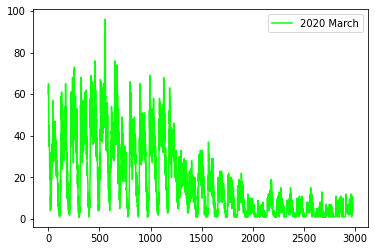

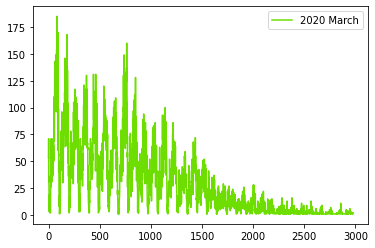

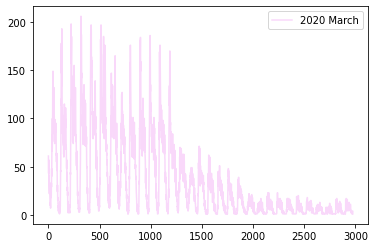

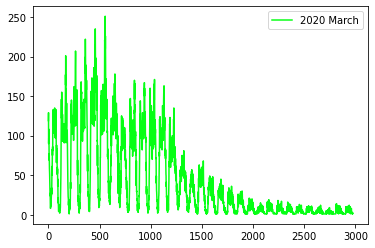

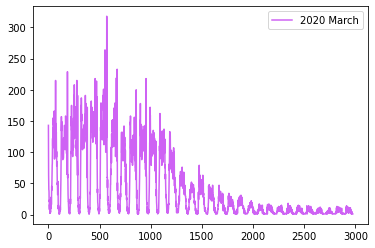

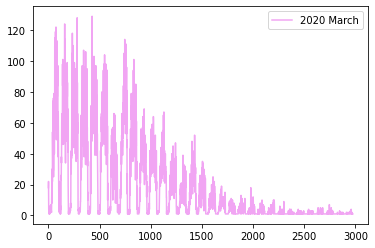

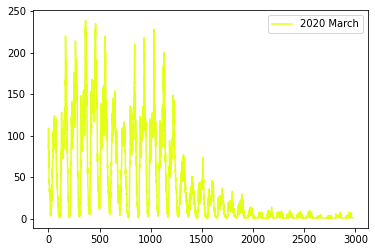

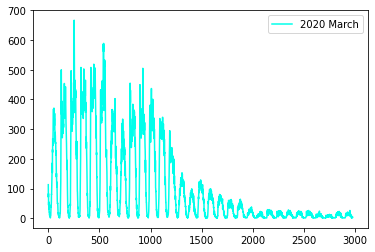

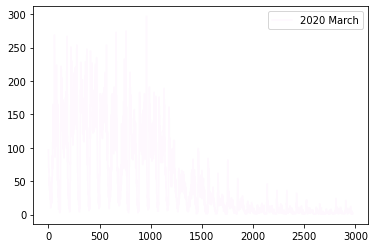

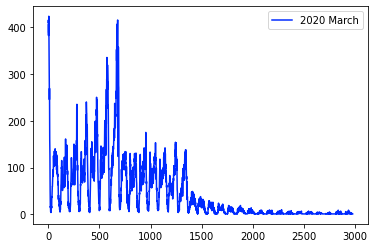

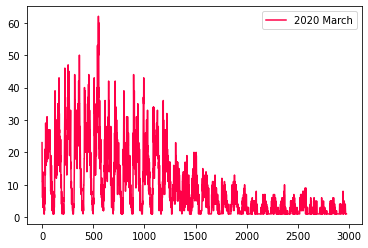

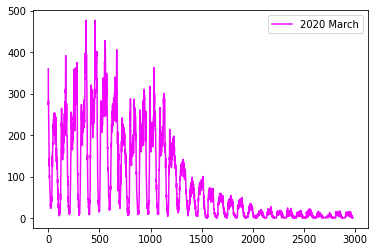

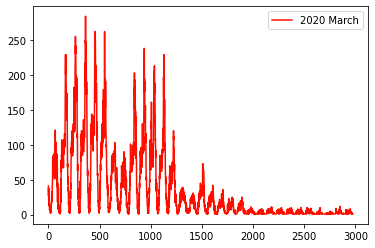

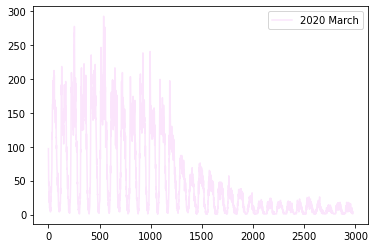

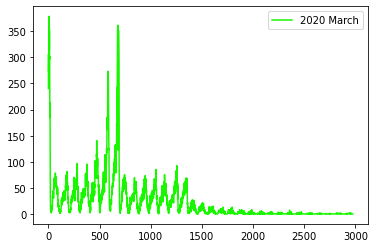

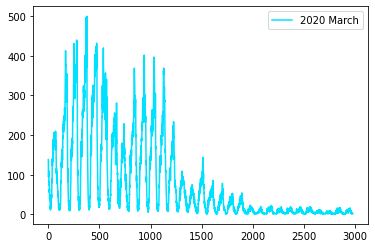

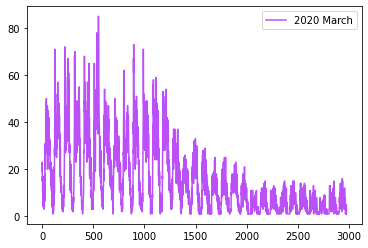

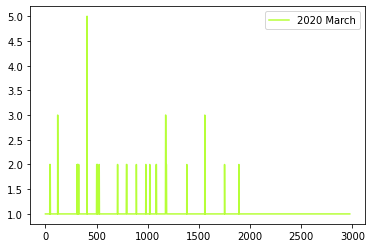

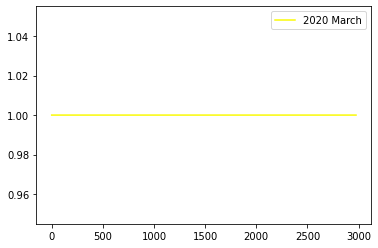

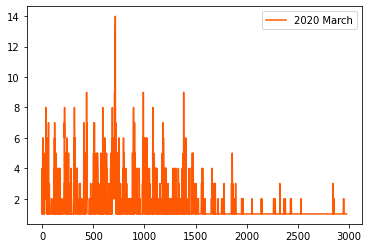

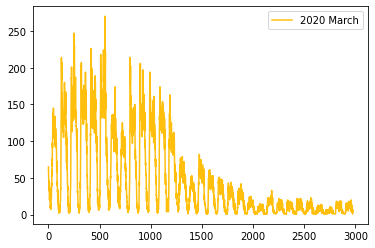

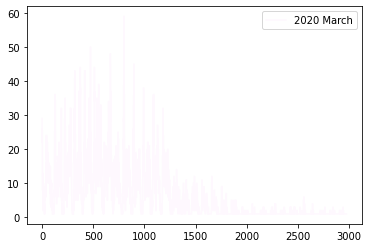

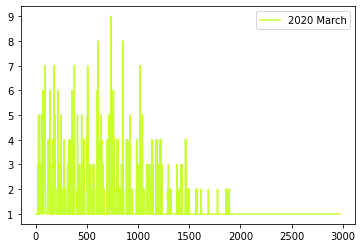

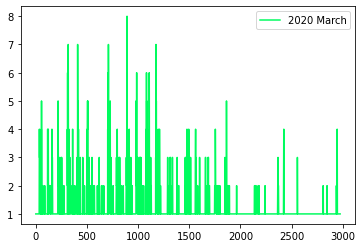

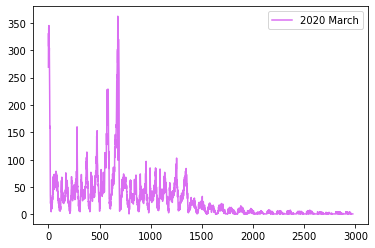

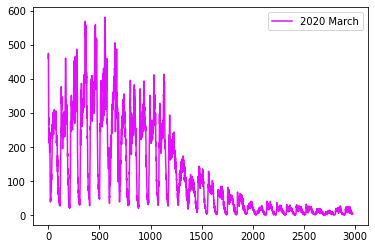

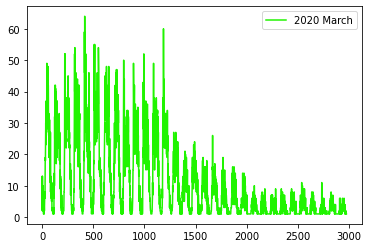

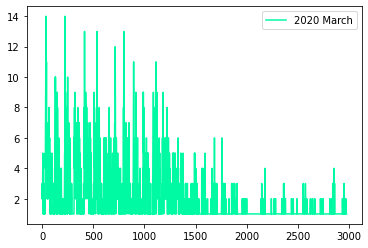

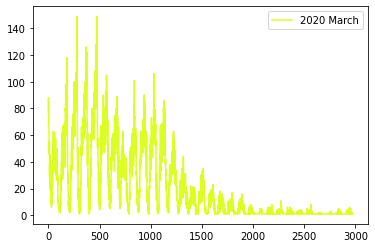

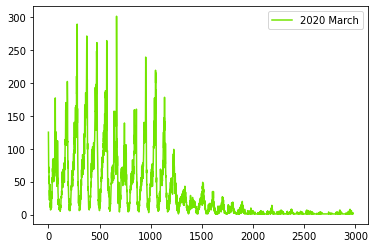

In [ ]:
first_x = list(range(0,2976))
for i in range(30):
    plt.plot(first_x,regions_final_list[i][:2976], color=plt.cm.gist_ncar(np.random.random()), label='2020 March')
    plt.legend()
    plt.show()

In [ ]:
alpha_parameter=0.3
Temporary_values=[]
ewa_pred_list = []
for i in range(0,30):
    for j in range(0,2976):
        if i==0:
            pred= regions_final_list[i][0]
            Temporary_values.append(0)
            continue
        Temporary_values.append(pred)
        pred =int((alpha_parameter*pred) + (1-alpha_parameter)*(regions_final_list[i][j]))
    ewa_pred_list.append(Temporary_values[5:])
    Temporary_values=[]

In [ ]:
len(ewa_pred_list[0])

2971

In [ ]:
Exponential_wgt_avg_pred_train = [i[:2079] for i in ewa_pred_list]
Exponential_wgt_avg_pred_test = [i[2079:] for i in ewa_pred_list]

test_EWA_standard = sum(Exponential_wgt_avg_pred_test, [])

In [ ]:
len(test_EWA_standard)

26760

In [ ]:
#Data modeling
Model_features = []
target = []
Model_features = [0]*5
#The windows taken for Time series analysis is 5, on the basis of the window we are predicting the 6th unit time instance
for i in range(0, 30):
  Model_features = np.vstack((Model_features, [regions_final_list[i][region_index:region_index+5] for region_index in range(0,len(regions_final_list[i])-5)]))
  target.append(regions_final_list[i][5:])

Model_features = Model_features[1:]

In [ ]:
Model_features.shape

(89130, 5)

In [ ]:
#Splitting the dataset size in 70:30 Ratio
print("size of train data :", int(2971*0.7))
print("size of test data :", int(2971*0.3))

size of train data : 2079
size of test data : 891


In [ ]:
#Train and test features

train_features_list =  [Model_features[i*2971:(2971*i+2079)] for i in range(0,40)]  

test_features_list = [Model_features[(2971*(i))+2079:2971*(i+1)] for i in range(0,40)]

In [ ]:
#Train and test labels
train_target = [i[:2079] for i in target]

test_target = [i[2079:] for i in target]


In [ ]:
len(train_target[1])

2079

In [ ]:
train_target_standard = sum(train_target, [])
test_target_standard = sum(test_target, [])

In [ ]:
len(train_target_standard)

62370

In [ ]:
len(test_target_standard)

26760

In [ ]:
train_new_features = []
for i in range(0,40):
    train_new_features.extend(train_features_list[i])
test_new_features = []
for i in range(0,40):
    test_new_features.extend(test_features_list[i])

In [ ]:
columns = ['series 5','series 4','series 3','series 2','series 1']
df_train = pd.DataFrame(data=train_new_features, columns=columns) 

df_test = pd.DataFrame(data=test_new_features, columns=columns)

In [ ]:
df_train

,series 5,series 4,series 3,series 2,series 1
0,60,64,65,56,56
1,64,65,56,56,44
2,65,56,56,44,45
3,56,56,44,45,35
4,56,44,45,35,38
...,...,...,...,...,...
62365,1,6,2,2,2
62366,6,2,2,2,2
62367,2,2,2,2,2
62368,2,2,2,2,1


In [ ]:
#Exponential Weighted Average

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
MAE_list = []
MSE_list = []

In [ ]:
MSE_list.append(mean_squared_error(test_target_standard, test_EWA_standard))
MAE_list.append(mean_absolute_error(test_target_standard, test_EWA_standard))

NameError: ignored

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
linear=LinearRegression()
linear.fit(df_train, train_target_standard)
y_pred = linear.predict(df_test)

In [ ]:
len(y_pred)

In [ ]:

MSE_list.append(mean_squared_error(test_target_standard, y_pred))
MAE_list.append(mean_absolute_error(test_target_standard, y_pred))

In [ ]:
#RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(df_train, train_target_standard)
y_pred_rf = random_forest_reg.predict(df_test)

In [ ]:
MSE_list.append(mean_squared_error(test_target_standard, y_pred_rf))
MAE_list.append(mean_absolute_error(test_target_standard, y_pred_rf))

In [ ]:
#XGBoost Regressor

In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
xgbreg = XGBRegressor()

xgbreg.fit(df_train, train_target_standard)
y_pred_xgb = xgbreg.predict(df_test)

In [ ]:
MSE_list.append(mean_squared_error(test_target_standard, y_pred_xgb))
MAE_list.append(mean_absolute_error(test_target_standard, y_pred_xgb))

In [ ]:
#Decision tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTreg = DecisionTreeRegressor(random_state=0)

DTreg.fit(df_train, train_target_standard)
y_pred_DT = DTreg.predict(df_test)

In [ ]:
MSE_list.append(mean_squared_error(test_target_standard, y_pred_DT))
MAE_list.append(mean_absolute_error(test_target_standard, y_pred_DT))

In [ ]:
Models = ['Base Line Model','Linear Regression', 'Random Forest Regressor', 'XGBRegressor', 'Decision Tree Regressor']

In [ ]:
PerformanceTable = pd.DataFrame(list(zip(Models, MSE_list, MAE_list)), columns=['Models', 'MSE', 'MAE'])

In [ ]:
PerformanceTable